### Пробуємо побудувати прості гарфіки

In [1]:
import numpy as np
import matplotlib.pyplot as plt


Згенеровано значень: 20
Значення по x: [-10  -9  -8  -7  -6  -5  -4  -3  -2  -1   0   1   2   3   4   5   6   7
   8   9]
Значення по y: [ 7.5   7.75  8.    8.25  8.5   8.75  9.    9.25  9.5   9.75 10.   10.25
 10.5  10.75 11.   11.25 11.5  11.75 12.   12.25]



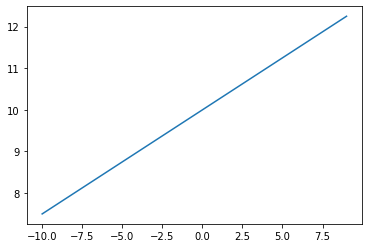

In [13]:
x = np.arange(-10, 10)
y = 10 + x/4
print(f"""
Згенеровано значень: {x.size}
Значення по x: {x}
Значення по y: {y}
""")
plt.plot(x,y)


Згенеровано значень: 20
Значення по x: [-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
  -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
   0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]
Значення по y: [ 90.          72.16066482  56.53739612  43.13019391  31.93905817
  22.96398892  16.20498615  11.66204986   9.33518006   9.22437673
  11.32963989  15.65096953  22.18836565  30.94182825  41.91135734
  55.09695291  70.49861496  88.11634349 107.9501385  130.        ]



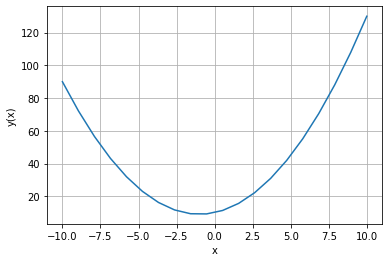

In [18]:
x = np.linspace(-10, 10, num=20)
y = x**2 + 2*x + 10
print(f"""
Згенеровано значень: {x.size}
Значення по x: {x}
Значення по y: {y}
""")

plt.xlabel("x")
plt.ylabel("y(x)")
plt.grid()
plt.plot(x,y)
plt.show()

### Знаходимо графічно розвязок системи рівнянь

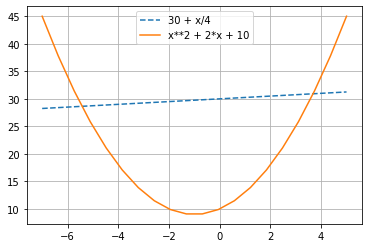

In [28]:
x = np.linspace(-7, 5, num=20)
y_a = 30 + x/4
y_b = x**2 + 2*x + 10

plt.plot(x, y_a, "--", label="30 + x/4")
plt.plot(x, y_b, "-", label="x**2 + 2*x + 10")
plt.legend()
plt.grid()
plt.show()